In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import pickle

In [4]:
import numpy as np

def list_of_lists_to_numpy(data):
    """
    Converts a list of lists of NumPy arrays into a 5D NumPy array
    with shape (z, height, width, channels, sample).
    
    Args:
        data (list of lists of np.ndarray): Nested list of NumPy arrays with shape (3, 180, 180).
        
    Returns:
        np.ndarray: A 5D NumPy array with shape (z, 180, 180, 3, sample).
    """
    # Convert nested list to NumPy array
    np_array = np.array(data)  # Shape: (sample, z, features, 180, 180)

    # Fix the axis ordering:
    np_array = np.transpose(np_array, (1, 3, 4, 2, 0))  # (z, 180, 180, 3, sample)

    return np_array  



In [ ]:
PATH_postrior_dict = "/home/simon/Documents/scripts/views_platform/views-models/models/purple_alien/data/generated/posterior_dict_36_calibration_20250212_070458.pkl"

with open(PATH_postrior_dict, "rb") as f:
    posterior_dict = pickle.load(f)

# Convert
result = list_of_lists_to_numpy(posterior_dict["posterior_list"])

# Verify shape
print("Final shape:", result.shape)  

Final shape: (36, 180, 180, 3, 128)


In [10]:
posterior_dict["posterior_list"][0][0].shape

(3, 180, 180)

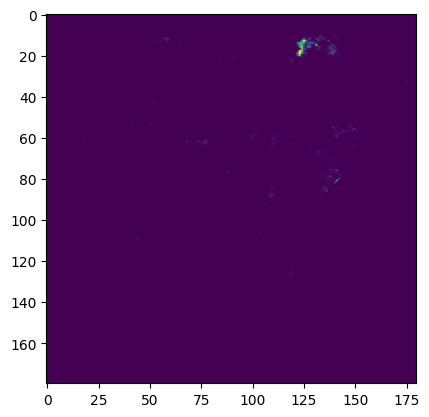

In [11]:

plt.imshow(posterior_dict["posterior_list"][0][0][0,:,:])

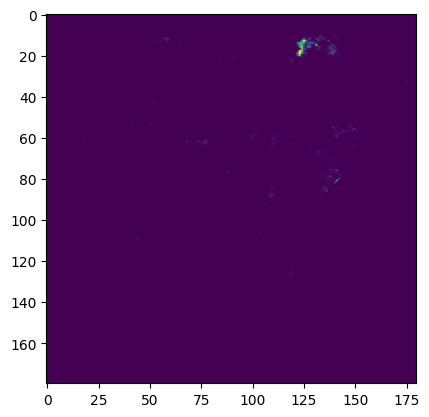

In [12]:
# now use imshow to plot the [0, : ,:, 0, 0] slice of the data

plt.imshow(result[0, :, :, 0, 0])
plt.show()

In [15]:
PATH_test_vol = "/home/simon/Documents/scripts/views_platform/views-models/models/purple_alien/data/generated/test_vol_36_calibration_20250212_070458.pkl"

with open(PATH_test_vol, "rb") as f:
    test_vol = pickle.load(f)

test_vol.shape

(1, 324, 3, 180, 180)

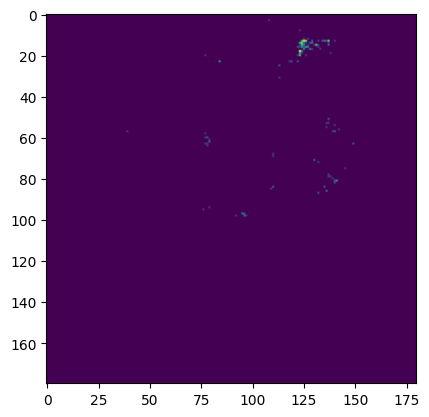

In [ ]:
# now use imshow to plot the [0, : ,:, 0, 0] slice of the data
plt.imshow(test_vol[0, 323, 0, :, :])
plt.show()

In [ ]:
# take the mean across z axis
result.shape
mean_result_vol = np.mean(result, axis=0)
mean_result_vol.shape

4.8163433

In [34]:
import numpy as np

def find_extreme_wh_pairs(array, num_pairs=10):
    """
    Finds the (w, h) pixel locations with the highest average value across all z slices.

    Args:
        array (np.ndarray): 3D NumPy array of shape (z, h, w) to search for extreme values.
        num_pairs (int, optional): Number of extreme (w, h) pairs to find. Default is 10.

    Returns:
        list: List of tuples (w, h, avg_value) representing the top extreme points.
    """
    # Compute the mean across z-axis (collapsing z)
    mean_projection = np.mean(array, axis=0)  # Shape is now (h, w)

    # Flatten for sorting
    h_indices, w_indices = np.indices(mean_projection.shape)
    flat_values = mean_projection.flatten()
    flat_h = h_indices.flatten()
    flat_w = w_indices.flatten()

    # Get indices of top `num_pairs` values in descending order
    extreme_indices = np.argsort(flat_values)[-num_pairs:][::-1]

    # Extract (w, h) coordinates and values
    extreme_pairs = [(int(flat_w[i]), int(flat_h[i]), float(flat_values[i])) for i in extreme_indices]

    return extreme_pairs

# Example: Extract a single sample's 3D array (z, h, w) from test_vol
selected_array = test_vol[0, :, :, 0]  # Shape (z, h, w)

# Find 10 most extreme (w, h) pairs based on highest average across z
extreme_pairs = find_extreme_wh_pairs(selected_array, num_pairs=10)

# Print results
for i, (w, h, value) in enumerate(extreme_pairs):
    print(f"{i+1}: (w={w}, h={h}) -> Avg Value: {value:.4f}")


1: (w=179, h=4) -> Avg Value: 0.0000
2: (w=156, h=1) -> Avg Value: 0.0000
3: (w=126, h=1) -> Avg Value: 0.0000
4: (w=125, h=1) -> Avg Value: 0.0000
5: (w=124, h=1) -> Avg Value: 0.0000
6: (w=123, h=1) -> Avg Value: 0.0000
7: (w=122, h=1) -> Avg Value: 0.0000
8: (w=121, h=1) -> Avg Value: 0.0000
9: (w=120, h=1) -> Avg Value: 0.0000
10: (w=119, h=1) -> Avg Value: 0.0000


meta_vol shape: (1, 324, 5, 180, 180)


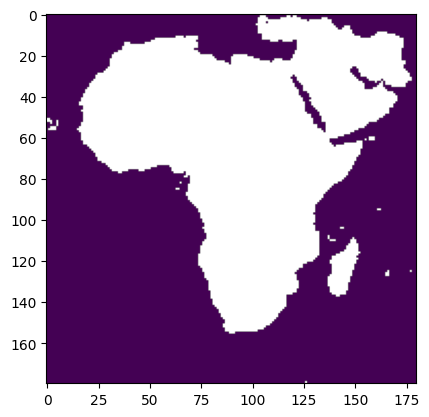

In [ ]:
PATH_meta_vol = "/home/simon/Documents/scripts/views_platform/views-models/models/purple_alien/data/generated/metadata_vol_36_calibration_20250212_070458.pkl"

with open(PATH_meta_vol, "rb") as f:
    meta_vol = pickle.load(f)

# Verify shape
print("meta_vol shape:", meta_vol.shape)

# Use the metadata to create a mask
mask = meta_vol[0, 0, 3, :, :] != 0

# Apply the mask to the test_vol
masked_image = np.ma.masked_array(test_vol[0, 323, 0, :, :], mask=~mask)

# Plot the masked image
plt.imshow(masked_image)
plt.show()

meta_vol shape: (1, 324, 5, 180, 180)
Mask shape: (180, 180)
Unique values in mask: [False  True]
test_vol shape: (1, 324, 5, 180, 180)
Unique values in test_vol[0, 323, 0]: [     0.  62356.  79599. ... 190508. 190510. 190511.]
Masked image shape: (180, 180)
Unique values in masked_image: [62356.0 79599.0 79600.0 ... 190510.0 190511.0 --]


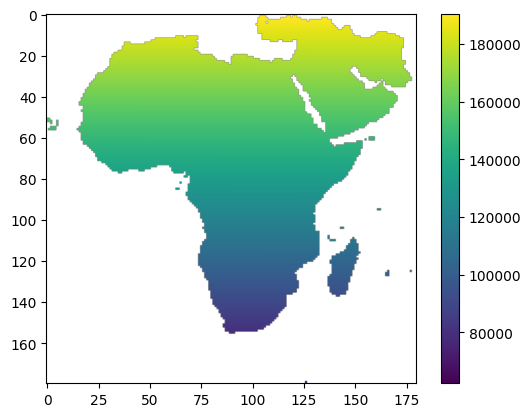

In [25]:
with open(PATH_meta_vol, "rb") as f:
    meta_vol = pickle.load(f)

print("meta_vol shape:", meta_vol.shape)

# Ensure valid mask
mask = meta_vol[0, 0, 3, :, :] != 0
print("Mask shape:", mask.shape)
print("Unique values in mask:", np.unique(mask))

# Ensure valid test_vol slice
print("test_vol shape:", test_vol.shape)
print("Unique values in test_vol[0, 323, 0]:", np.unique(test_vol[0, 323, 0]))

# Apply the mask to the test_vol
masked_image = np.ma.masked_array(test_vol[0, 323, 0, :, :], mask=~mask)

# Ensure masked_image is valid
print("Masked image shape:", masked_image.shape)
print("Unique values in masked_image:", np.unique(masked_image))

# Plot with color normalization
plt.imshow(masked_image.filled(np.nan), cmap='viridis')
plt.colorbar()
plt.show()

In [21]:
np.unique(meta_vol[0, 0, 3, :, :])

array([  0., 121.], dtype=float32)

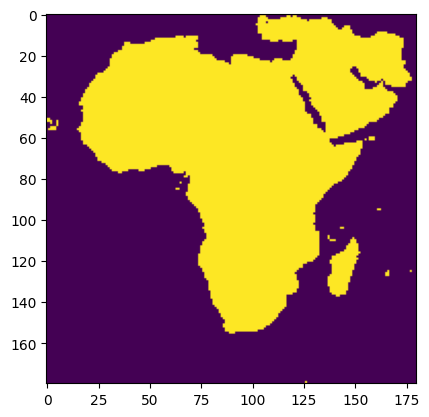

In [20]:
plt.imshow(meta_vol[0, 0, 3, :, :])
plt.show()

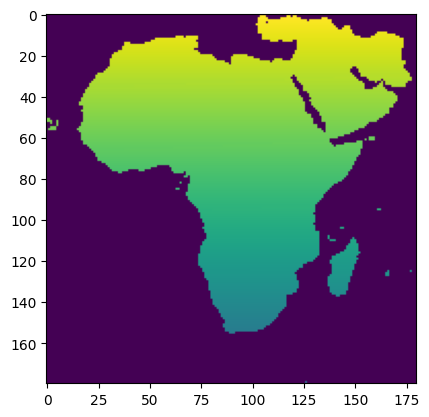

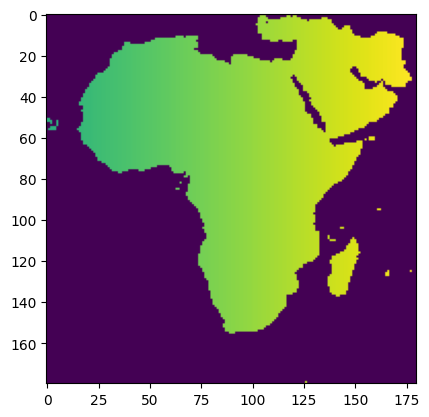

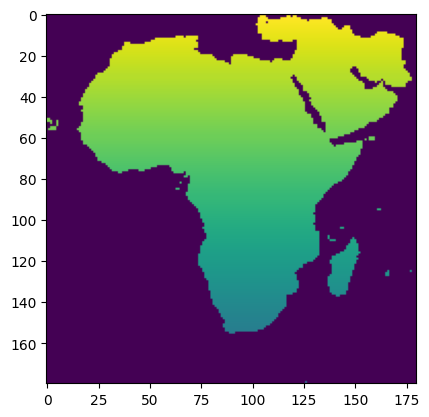

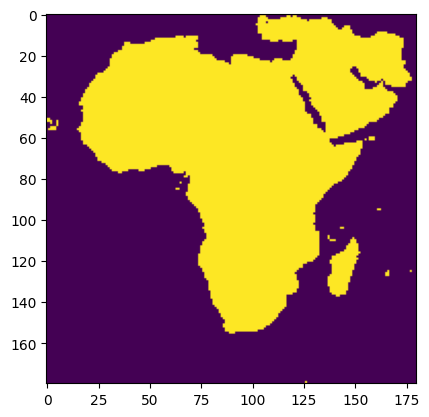

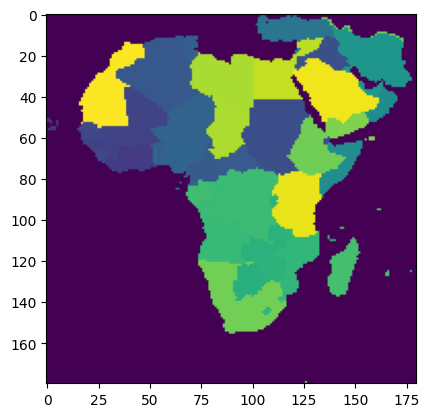

In [19]:
# plot each of the features in the metadata

for i in range(meta_vol.shape[2]):
    plt.imshow(meta_vol[0, 0, i, :, :])
    plt.show()

In [14]:
# Its clear that I need to do something about the naming convention here... 

PATH_df_output = "/home/simon/Documents/scripts/views_platform/views-models/models/purple_alien/data/generated/df_sb_os_ns_output_36_calibration_20250131_021558.pkl"
#PATH_df_output = "/home/simon/Documents/scripts/views_platform/views-models/models/purple_alien/data/generated/df_sb_os_ns_output_36_calibration_20250131_104437.pkl"

df_output = pd.read_pickle(PATH_df_output)

In [15]:
df_output

,y_score,y_score_prob,y_var,y_var_prob,y_true,y_true_binary,pg_id,out_sample_month,y_score,y_score_prob,...,pg_id,out_sample_month,y_score,y_score_prob,y_var,y_var_prob,y_true,y_true_binary,pg_id,out_sample_month
0,0.0,0.047755,0.0,0.027795,0.0,0.0,NaN,NaN,0.0,0.043836,...,NaN,NaN,0.0,0.043378,0.0,0.014293,0.0,0.0,NaN,NaN
1,0.0,0.030896,0.0,0.022701,0.0,0.0,NaN,NaN,0.0,0.038706,...,NaN,NaN,0.0,0.037909,0.0,0.017855,0.0,0.0,NaN,NaN
2,0.0,0.037407,0.0,0.016484,0.0,0.0,NaN,NaN,0.0,0.013157,...,NaN,NaN,0.0,0.033338,0.0,0.016355,0.0,0.0,NaN,NaN
3,0.0,0.022572,0.0,0.007446,0.0,0.0,NaN,NaN,0.0,0.017869,...,NaN,NaN,0.0,0.035052,0.0,0.019409,0.0,0.0,NaN,NaN
4,0.0,0.017976,0.0,0.004499,0.0,0.0,NaN,NaN,0.0,0.015370,...,NaN,NaN,0.0,0.014773,0.0,0.007076,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166395,0.0,0.031826,0.0,0.009626,0.0,0.0,NaN,NaN,0.0,0.016529,...,NaN,NaN,0.0,0.028116,0.0,0.008996,0.0,0.0,NaN,NaN
1166396,0.0,0.035275,0.0,0.010569,0.0,0.0,NaN,NaN,0.0,0.016191,...,NaN,NaN,0.0,0.035694,0.0,0.014755,0.0,0.0,NaN,NaN
1166397,0.0,0.048213,0.0,0.021734,0.0,0.0,NaN,NaN,0.0,0.023583,...,NaN,NaN,0.0,0.036429,0.0,0.020995,0.0,0.0,NaN,NaN
1166398,0.0,0.048557,0.0,0.018515,0.0,0.0,NaN,NaN,0.0,0.018908,...,NaN,NaN,0.0,0.050009,0.0,0.015580,0.0,0.0,NaN,NaN


In [18]:
PATH_postrior_dict  = "/home/simon/Documents/scripts/views_platform/views-models/models/purple_alien/data/generated/posterior_dict_36_calibration_20250131_104437.pkl"

with open(PATH_postrior_dict, "rb") as f:
    posterior_dict = pickle.load(f)

In [22]:
vol = posterior_dict['out_of_sample_vol']

In [45]:
type(posterior_dict["posterior_list"][0][0])

numpy.ndarray

In [46]:
len(posterior_dict["posterior_list"][0][0])

3

In [48]:
posterior_dict["posterior_list"][0][0].shape

(3, 180, 180)

In [23]:
vol.shape

(1, 36, 3, 180, 180)

In [24]:
# check for nans
np.isnan(vol).sum()

0